In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt

from sklearn.naive_bayes import BernoulliNB
import seaborn as sns
imdb = pd.read_csv('C:/Users/ezzan/Downloads/python_drills/imdb_labelled.txt', delimiter= '\t', header=None)
imdb.columns = ['review', 'rating']
imdb.head(100)

,review,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [29]:
imdb['rating'].value_counts()

1    386
0    362
Name: rating, dtype: int64

In [170]:
ngkeywords = ['stink', 'Boring', 'hated', 'hate', 'disappointing', 'worst', 'bad','badly', 'waste of time','wasted', 'sucked', 'terrible', 'horrible', 'poorly']
poskeywords = ['amazing', 'brilliant', 'good', 'nice', 'happy', 'must see', 'well']   

In [171]:
for ng in ngkeywords:
    imdb[str(ng)] = imdb.review.str.contains(
        ' ' + str(ng),
        case=False)

In [172]:
for ng in poskeywords:
    imdb[str(ng)] = imdb.review.str.contains(
        ' ' + str(ng),
        case=False)

In [173]:
for ng in ngkeywords:
    testdata = imdb[imdb[ng] == True]
    print(ng)
    print(len(testdata))

stink
2
Boring
9
hated
1
hate
3
disappointing
2
worst
9
bad
54
badly
2
waste of time
5
wasted
4
sucked
3
terrible
10
horrible
4
poorly
2


In [165]:
for ng in poskeywords:
    testdata = imdb[imdb[ng] == True]
    print(ng)
    print(len(testdata))

amazing
7
brilliant
6
good
43
nice
6
captivating
0
happy
1
must see
2
well
30


In [158]:
for ng in poskeywords:
    imdb[str(ng)] = imdb.review.str.contains(
        ' ' + str(ng),
        case=False)

In [159]:
imdb.head()

,review,rating,stink,boring,hated,disappointing,bad,waste of time,sucked,terrible,...,amazing,brilliant,good,nice,captivating,happy,must see,well,worst,Boring
0,"A very, very, very slow-moving, aimless movie ...",0,False,<bound method StringMethods.contains of <panda...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,<bound method StringMethods.contains of <panda...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,<bound method StringMethods.contains of <panda...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,<bound method StringMethods.contains of <panda...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,<bound method StringMethods.contains of <panda...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


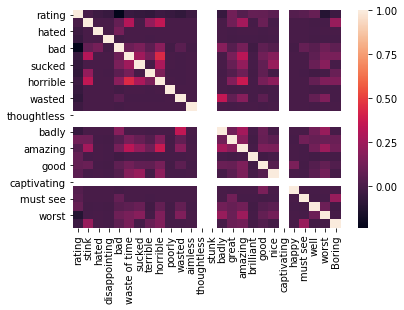

In [160]:
sns.heatmap(imdb.corr())

In [183]:
data = imdb[ngkeywords + poskeywords]
target = imdb['review']

In [182]:
bnb = BernoulliNB()
bnb.fit(data, target)
predict = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != predict).sum()
))


Number of mislabeled points out of a total 748 points : 740


In [163]:
bnb = BernoulliNB()
bnb.fit(data1, target)
predict = bnb.predict(data1)

print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target != predict).sum()
))

Number of mislabeled points out of a total 748 points : 741


In [125]:
yelp = pd.read_csv('C:/Users/ezzan/Downloads/python_drills/yelp_labelled.txt', delimiter= '\t', header=None)
yelp.columns = ['review', 'rating']
yelp.head(100)

,review,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [194]:
ngkeywords1 = ['stink', 'boring', 'hated', 'disappointing', 'worst', 'bad', 'waste of time','wasted','stunk', 'sucked', 'terrible', 'horrible', 'poorly']
poskeywords = ['amazing', 'brilliant', 'good', 'nice', 'captivating', 'happy', 'must see', 'well']   

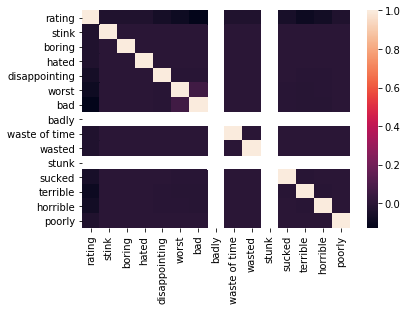

In [195]:
sns.heatmap(yelp.corr())

In [196]:
for ng in ngkeywords1:
    yelp[str(ng)] = yelp.review.str.contains(
        ' ' + str(ng),
        case=False)

In [197]:
data2 = yelp[ngkeywords1]
target1 = yelp['review']

In [198]:
bnb = BernoulliNB()
bnb.fit(data2, target1)
predict = bnb.predict(data2)

print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target1 != predict).sum()
))


Number of mislabeled points out of a total 1000 points : 996
